In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go



In [3]:
# Load data
with open('data-for-publication.xlsx', 'rb') as f:
    dogs = pd.read_excel(f, sheet_name='Dataset', header=0)
display(dogs)

,dog.id,breed_group,sex,sterilization_status,Noise.sensitivity_age,Fearfulness_age,Aggression_age,Surface_age,Separation_age,Impulsivity_age,...,Vas_8_excessive,Vas_9_alwaysplay,Vas_10_complicatedtasks,Vas_11_reacthastily,Vas_12_easilydistracted,Vas_13_cannotwait,impulsive,impulsiveness_disturbes,inattention_score,impulsivity_score
0,1,Jack_Russell_Terrier,female,sterilized,14.241650,14.181420,14.236174,14.233437,14.181420,14.236174,...,2.0,3.0,2.0,2.0,3.0,2.0,0.0,3.0,0.993593,0.097521
1,2,Jack_Russell_Terrier,female,intact,8.693866,8.359294,8.693866,8.353818,NaN,8.422270,...,2.0,3.0,1.0,1.0,2.0,2.0,NaN,2.0,-0.633266,0.904661
2,3,Pinschers_Schnauzers,male,intact,1.992701,1.992701,1.992701,1.992701,1.992701,1.992701,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN
3,4,Pinschers_Schnauzers,male,sterilized,5.405751,5.405751,5.405751,5.405751,5.405751,5.405751,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,-0.528441,-0.822966
4,5,German_Shepherd_Dog,male,sterilized,3.875205,4.006568,3.875205,4.006568,4.006568,4.006568,...,3.0,3.0,2.0,2.0,4.0,2.0,1.0,5.0,0.347356,1.438794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15366,15367,Labrador_Retriever,male,sterilized,4.515599,4.515599,4.515599,4.515599,4.515599,4.515599,...,3.0,3.0,1.0,2.0,2.0,2.0,0.0,4.0,0.002578,1.165461
15367,15368,Labrador_Retriever,male,intact,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15368,15369,Pointers,female,intact,5.315693,NaN,5.315693,5.315693,5.315693,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15369,15370,Hunting_terriers,male,intact,1.447332,1.447332,1.447332,1.447332,1.447332,1.447332,...,1.0,3.0,2.0,2.0,3.0,1.0,0.0,1.0,-0.076717,-0.764367


In [4]:
# for col_name in ['breed_group', 'sex', 'sterilization_status']:
# figure, axes = plt.subplots(1,3, figsize=(20,8))
# sns.barplot(dogs['breed_group'].value_counts().reset_index(), x='breed_group', y='count', ax=axes[0])
fig = px.bar(dogs['breed_group'].value_counts().reset_index(), y='breed_group', x='count', title='Pocty jednotlivych plemien v datach', width=1000, height=600)
fig.show()

In [5]:
df = dogs.groupby(by=['sterilization_status','sex'])['dog.id'].count()#.rename(columns={'dog.id':'count'})#.reset_index().set_index(['sex', 'sterilization_status'])
display(df)
display(df['sterilized', 'male'])

fig = go.Figure(data=[
    go.Bar(name='sterlized', x=['male', 'female'], y=[df['sterilized', 'male'], df['sterilized', 'female']]),
    go.Bar(name='intact', x=['male', 'female'], y=[df['intact', 'male'], df['intact', 'female']])
])
fig.update_layout(barmode='stack', width=700, title='Number of male and female sterilized/intact dogs')
fig.show()

# fig = px.bar(dogs['sex'].value_counts().reset_index(), y='sex', x='count', title='Pocty jednotlivych psov podla poh', width=1000, height=600)
# fig.show()

sterilization_status  sex   
intact                female    6020
                      male      5738
sterilized            female    2114
                      male      1499
Name: dog.id, dtype: int64

1499

sex
female    18.556165
male      22.469875
Name: weight_kg, dtype: float64

<Axes: xlabel='weight_kg', ylabel='Count'>

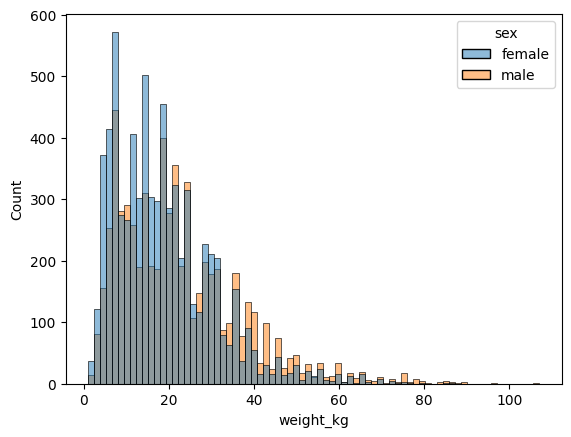

In [6]:
df = dogs.groupby(by=['sex'])['weight_kg'].mean()
display(df)

sns.histplot(data=dogs, x='weight_kg', hue='sex', hue_order={'female':'blue', 'male':'blue'})

In [7]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=dogs.query('sex == "male"')['weight_kg'], name='Male', hovertext=dogs.query('sex == "male"')['dog.id']))
fig.add_trace(go.Histogram(x=dogs.query('sex == "female"')['weight_kg'], name='Female',  hovertext=dogs.query('sex == "female"')['dog.id']))

# Overlay both histograms
fig.update_layout(barmode='overlay', xaxis_title='Weight in KG')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

,dog.id,variable,value
0,1,Noise.sensitivity_age,14.241650
1,2,Noise.sensitivity_age,8.693866
2,3,Noise.sensitivity_age,1.992701
3,4,Noise.sensitivity_age,5.405751
4,5,Noise.sensitivity_age,3.875205
...,...,...,...
107592,15367,Personality_age,4.515599
107593,15368,Personality_age,3.025325
107594,15369,Personality_age,5.315693
107595,15370,Personality_age,1.447332


<Axes: xlabel='value', ylabel='Density'>

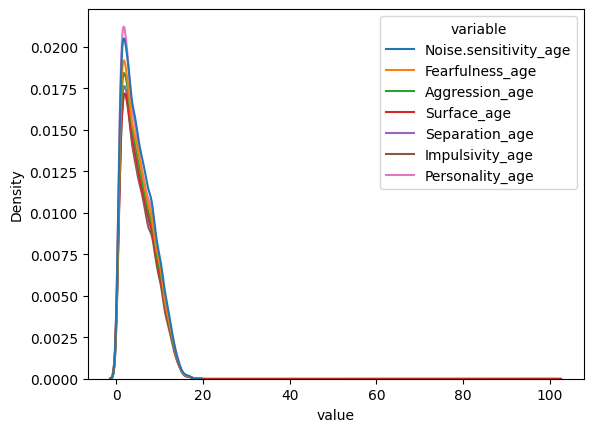

In [8]:
categories = ['Noise.sensitivity_age',
'Fearfulness_age',
'Aggression_age',
'Surface_age',
'Separation_age',
'Impulsivity_age',
'Personality_age']

ages_melt = dogs[categories + ['dog.id']].melt(id_vars='dog.id')
display(ages_melt)

sns.kdeplot(data=ages_melt, x='value', hue='variable')


In [12]:
fig = px.line(ages_melt[ages_melt['dog.id'] < 100], x='variable', y='value', color='dog.id', markers=True)
fig.show()

In [ ]:
ages = dogs[categories + ['dog.id']]
display(ages.describe())

display(dogs.query('Surface_age > 100'))

,Noise.sensitivity_age,Fearfulness_age,Aggression_age,Surface_age,Separation_age,Impulsivity_age,Personality_age,dog.id
count,13123.000000,12161.000000,11713.000000,11129.000000,11185.000000,10753.000000,12875.000000,15371.000000
mean,5.246486,5.230036,5.242948,5.266785,5.243517,5.210482,5.141402,7686.000000
std,3.450814,3.442324,3.439122,3.539961,3.428296,3.402024,3.449621,4437.369829
min,0.161644,0.178082,0.178082,0.178082,0.191781,0.191781,0.164384,1.000000
25%,2.343600,2.332649,2.362226,2.384124,2.364964,2.364964,2.219891,3843.500000
50%,4.619595,4.605696,4.605696,4.641716,4.613910,4.567360,4.471931,7686.000000
75%,7.685732,7.661089,7.672445,7.677517,7.675182,7.606328,7.578659,11528.500000
max,18.088980,18.088980,18.088980,100.969900,18.088980,18.088980,17.126690,15371.000000


,dog.id,breed_group,sex,sterilization_status,Noise.sensitivity_age,Fearfulness_age,Aggression_age,Surface_age,Separation_age,Impulsivity_age,...,Vas_8_excessive,Vas_9_alwaysplay,Vas_10_complicatedtasks,Vas_11_reacthastily,Vas_12_easilydistracted,Vas_13_cannotwait,impulsive,impulsiveness_disturbes,inattention_score,impulsivity_score
15370,15371,Teacup_dogs,male,intact,18.08898,18.08898,18.08898,100.9699,18.08898,18.08898,...,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,-0.41932,-0.66403


In [13]:
display(dogs)

,dog.id,breed_group,sex,sterilization_status,Noise.sensitivity_age,Fearfulness_age,Aggression_age,Surface_age,Separation_age,Impulsivity_age,...,Vas_8_excessive,Vas_9_alwaysplay,Vas_10_complicatedtasks,Vas_11_reacthastily,Vas_12_easilydistracted,Vas_13_cannotwait,impulsive,impulsiveness_disturbes,inattention_score,impulsivity_score
0,1,Jack_Russell_Terrier,female,sterilized,14.241650,14.181420,14.236174,14.233437,14.181420,14.236174,...,2.0,3.0,2.0,2.0,3.0,2.0,0.0,3.0,0.993593,0.097521
1,2,Jack_Russell_Terrier,female,intact,8.693866,8.359294,8.693866,8.353818,NaN,8.422270,...,2.0,3.0,1.0,1.0,2.0,2.0,NaN,2.0,-0.633266,0.904661
2,3,Pinschers_Schnauzers,male,intact,1.992701,1.992701,1.992701,1.992701,1.992701,1.992701,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN
3,4,Pinschers_Schnauzers,male,sterilized,5.405751,5.405751,5.405751,5.405751,5.405751,5.405751,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,-0.528441,-0.822966
4,5,German_Shepherd_Dog,male,sterilized,3.875205,4.006568,3.875205,4.006568,4.006568,4.006568,...,3.0,3.0,2.0,2.0,4.0,2.0,1.0,5.0,0.347356,1.438794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15366,15367,Labrador_Retriever,male,sterilized,4.515599,4.515599,4.515599,4.515599,4.515599,4.515599,...,3.0,3.0,1.0,2.0,2.0,2.0,0.0,4.0,0.002578,1.165461
15367,15368,Labrador_Retriever,male,intact,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15368,15369,Pointers,female,intact,5.315693,NaN,5.315693,5.315693,5.315693,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15369,15370,Hunting_terriers,male,intact,1.447332,1.447332,1.447332,1.447332,1.447332,1.447332,...,1.0,3.0,2.0,2.0,3.0,1.0,0.0,1.0,-0.076717,-0.764367


In [22]:
aggressive_columns = ['Aggressive_dogs_samegender', 'Aggressive_people', 'Aggressive_dogs_oppositegender', 'aggressiveness_dominance_score']

means = dogs.groupby('breed_group')[aggressive_columns].mean().reset_index()
means['Aggressive_columns_sum'] = means[aggressive_columns[0]] + means[aggressive_columns[1]] + means[aggressive_columns[2]]
means.sort_values(by='Aggressive_columns_sum', inplace=True)
fig = px.bar(means, y='breed_group', x=aggressive_columns[:-1])

fig.show()

In [28]:
means['aggressiveness_dominance_score_positive'] = means['aggressiveness_dominance_score'] - means['aggressiveness_dominance_score'].min()
means2 = means.sort_values(by='aggressiveness_dominance_score_positive')
fig = px.bar(means2, y='breed_group', x='aggressiveness_dominance_score_positive')
fig.show()